### 1次元のカーブフィッティング

scipy.optimize.curve_fitによるカーブフィッティング
polyvalは多項式のみだから汎用的でない

#### 1次の多項式

In [41]:
# 必要なモジュールのインポート
from numpy import *
from matplotlib.pyplot import *
from scipy.optimize import curve_fit

In [2]:
# モデルを用意する
def model_poly1d(x, a, b):
    return a * x + b

In [3]:
# データを用意する
x = linspace(-5, 5, 101)
y_model = model_poly1d(x, a=5, b=10)

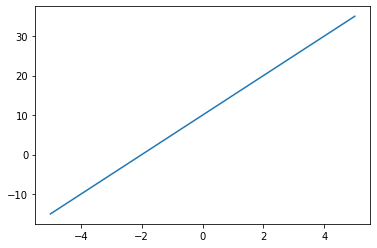

In [4]:
plot(x, y_model)

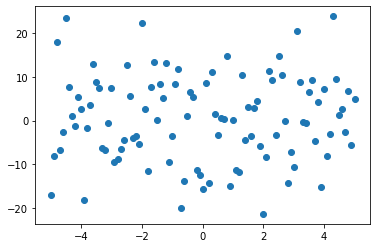

In [5]:
noise = random.normal(0, 10, len(x))
scatter(x, noise)

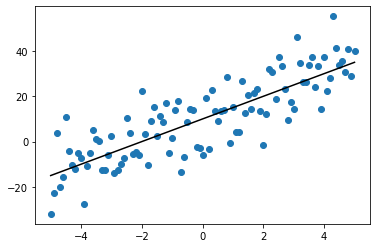

In [6]:
y_exp = y_model + noise
scatter(x, y_exp)
plot(x, y_model, color='black')

In [7]:
param, covar = curve_fit(model_poly1d, x, y_exp)
param

array([ 5.06068685, 10.48641813])

In [8]:
# error
print(covar)
print(diag(covar))
print(sqrt(diag(covar)))

[[ 1.15635053e-01 -1.13125471e-10]
 [-1.13125471e-10  9.82897970e-01]]
[0.11563505 0.98289797]
[0.34005154 0.99141211]


In [9]:
y_fit = model_poly1d(x, param[0], param[1])

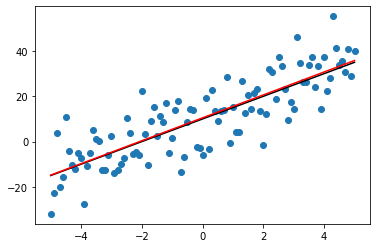

In [10]:
%matplotlib inline
scatter(x, y_exp)
plot(x, y_model, color='black')
plot(x, y_fit, color='red')

#### 指数関数

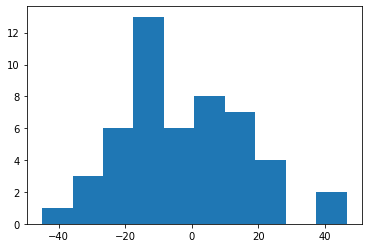

In [21]:
h = hist(noise, bins=10)

In [13]:
def gaussian(x, mu, sigma):
    return (1/sqrt(2*pi*power(sigma,2))) * exp(-power(x-mu,2)/sqrt(2*power(sigma,2)))

In [34]:
param, covar = curve_fit(gaussian, h[1][:-1], h[0])

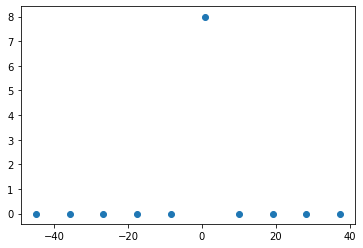

In [37]:
noise_fit = gaussian(h[1][:-1], param[0], param[1])
scatter(h[1][:-1], noise_fit)

### 2次元のカーブフィッティング

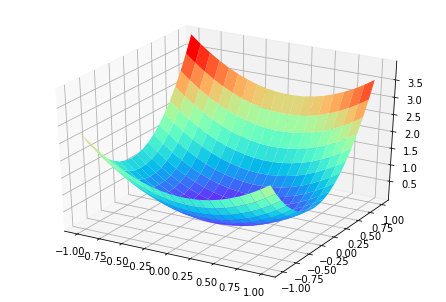

In [42]:
from scipy.optimize import least_squares
from mpl_toolkits.mplot3d import Axes3D

def h(theta, x, y):
    return theta[2] * (x - theta[0])**2 + theta[3] * (y - theta[1])**2

xs = linspace(-1, 1, 20)
ys = linspace(-1, 1, 20)
gridx, gridy = meshgrid(xs, ys)
x0 = 0.1; y0 = -0.15; a = 1; b = 2; noise = 0.1
hs = h([x0, y0, a, b], gridx, gridy)
hs += noise * random.default_rng().random(hs.shape)

def fun(theta):
    return (h(theta, gridx, gridy) - hs).flatten()

theta0 = [0, 0, 1, 2]
res3 = least_squares(fun, theta0)

ax = Axes3D(figure())
ax.plot_surface(gridx,gridy,h(res3.x, gridx, gridy),cmap='rainbow')